# SoundVision 👁️
##### My Github:ARSALANnam(Echolyno)
##### My Email: arsalannam9710@gmail.com
##### My Linkedin:www.linkedin.com/in/arsalannam

## This project is a Music Genre Classifier built with Deep Learning (Keras & TensorFlow) using the features_3_sec.csv dataset (extracted from the GTZAN dataset). The model achieves around 91% accuracy on the test set.

## GPU Test

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


# Import Packages

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

## Read CSV

In [39]:
df = pd.read_csv("features_3_sec.csv")

# preprocessing

In [40]:
X = df.drop(columns=["filename", "length", "label"])
y = df["label"]

In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y) 

# Train, Test, Split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model Definition

In [46]:
model = keras.Sequential([
    keras.layers.Dense(1024, activation="relu", input_shape=(X.shape[1],)),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.5),
    
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),

    keras.layers.Dense(y.shape[1], activation="softmax")
])

## Compile

In [47]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

## Fit

In [48]:
history = model.fit(X_train, y_train, epochs=100, batch_size=198, validation_split=0.2, verbose=1)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 121ms/step - accuracy: 0.2536 - loss: 2.0637 - val_accuracy: 0.4246 - val_loss: 1.5919
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4009 - loss: 1.6495 - val_accuracy: 0.5335 - val_loss: 1.3123
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4854 - loss: 1.4248 - val_accuracy: 0.5972 - val_loss: 1.1485
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5511 - loss: 1.2602 - val_accuracy: 0.6735 - val_loss: 0.9824
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6013 - loss: 1.1425 - val_accuracy: 0.7173 - val_loss: 0.8711
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6449 - loss: 1.0531 - val_accuracy: 0.7255 - val_loss: 0.8049
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6700 - loss: 0.9636 - val_accuracy: 0.7586 - val_loss: 0.7360
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6929 - loss: 0.9120 - val_accuracy: 0.77

In [50]:
loss, acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", acc)
print("Test Loss:", loss)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9149 - loss: 0.3301
Test Accuracy: 0.9149149060249329
Test Loss: 0.33007538318634033


# Confusion Matrix

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


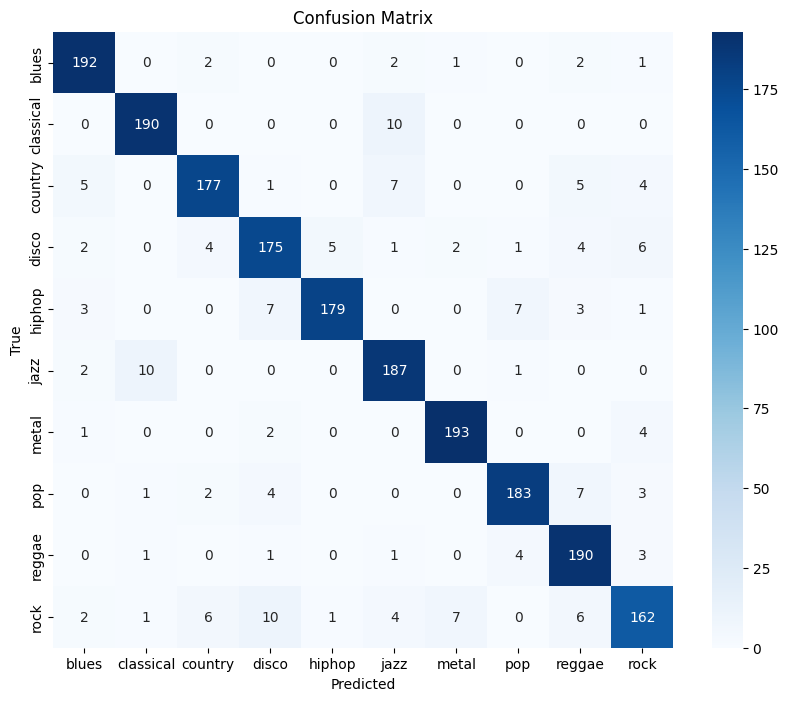

In [51]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Accuracy & Loss

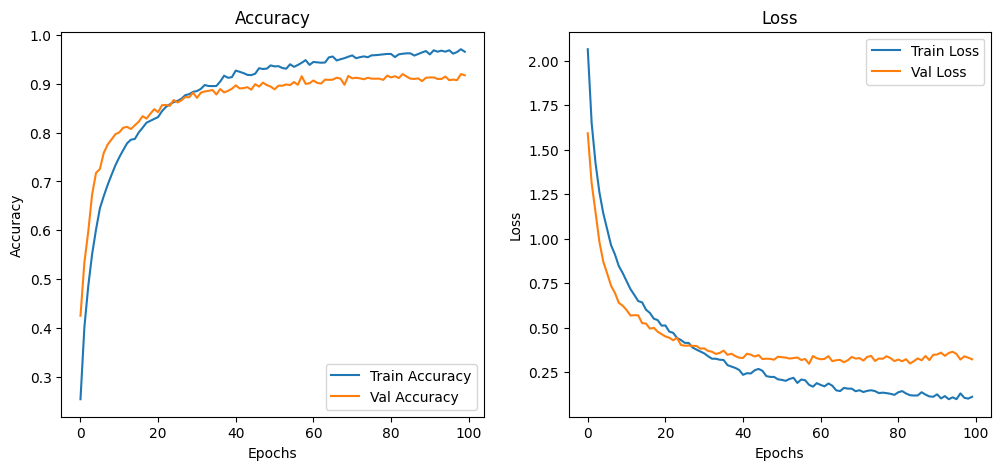

In [52]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Thank you for your Support 🤗